In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

# Set DataFrame

In [3]:
percent_EUR = np.arange(0, 100, 0.1)
df = pd.DataFrame(percent_EUR, columns=['%_EUR'])
pd.set_option("display.max_rows", None, "display.max_columns", None)

# Create Function

In [4]:
def oil_TypeCurve(df):
   
    # Reservoir Input
    EUR = 10 # MMSTB
    Pi = 3000 # psia
    Rsi = 500 # STB/STB
    Qo_abd = 369.39 # STB/D
    Pabd = 3000 # psia
    GOR_limit = 50000 # SCF/STB
    WCUT_limit = 100 # %
    Downtime = 100 # %       

    # Type Curves Input for Oil Rate
    end_incl_per_1 = 1.708
    ini_incl_rate_1 = 2.960
    incl_fact_1 = 1.220
    end_plat_per_1 = 60.069
    plat_rate_1 = 23.680
    str_dec_per_1 = 60.069
    ini_dec_rate_1 = 2134.172
    dec_fact_1 = -0.074
    
    # Oil Rate
    for i in range(0, len(df)):
        if df.loc[i, '%_EUR'] <= end_incl_per_1:
            oil_rate = ini_incl_rate_1*(np.exp((df.loc[i, '%_EUR'])*incl_fact_1))
        else:
            if df.loc[i, '%_EUR'] < str_dec_per_1:
                oil_rate = plat_rate_1
            else:
                if ini_dec_rate_1*np.exp(df.loc[i, '%_EUR']*dec_fact_1) > plat_rate_1:
                    oil_rate = plat_rate_1
                else:
                    oil_rate = ini_dec_rate_1*(np.exp(df.loc[i, '%_EUR']*dec_fact_1))
        df.loc[i, 'Oil_Rate'] = round(oil_rate, 3)
        
    # Type Curves Input for GOR/Rsi
    end_incl_per_2 = 95.123
    ini_incl_rate_2 = 1.463
    incl_fact_2 = 0.004
    end_plat_per_2 = 100.000
    plat_rate_2 = 2.237
    str_dec_per_2 = 0.000
    ini_dec_rate_2 = 1.000
    dec_fact_2 = -0.010
    
    # GOR/Rsi
    for i in range(0, len(df)):
        if end_incl_per_2 < str_dec_per_2:
            if df.loc[i, '%_EUR'] <= end_incl_per_2:
                GOR_Rsi = ini_incl_rate_2*(np.exp(df.loc[i, '%_EUR']*incl_fact_2))
            else:
                if df.loc[i, '%_EUR'] <= str_dec_per_2:
                    GOR_Rsi = plat_rate_2
                else:
                    if ini_dec_rate_2*(np.exp(df.loc[i, '%_EUR']*dec_fact_2)) > plat_rate_2:
                        GOR_Rsi = plat_rate_2
                    else:
                        GOR_Rsi = ini_dec_rate_2*(np.exp(df.loc[i, '%_EUR']*dec_fact_2))
        else:
            if df.loc[i, '%_EUR'] <= end_incl_per_2:
                GOR_Rsi = ini_incl_rate_2*(np.exp(df.loc[i, '%_EUR']*incl_fact_2))
            else:
                if df.loc[i, '%_EUR'] <= end_plat_per_2:
                    GOR_Rsi = plat_rate_2
                else:
                    if ini_dec_rate_2*(np.exp(df.loc[i, '%_EUR']*dec_fact_2)) > plat_rate_2:
                        GOR_Rsi = plat_rate_2
                    else:
                        GOR_Rsi = ini_dec_rate_2*(np.exp(df.loc[i, '%_EUR']*dec_fact_2))
        df.loc[i, 'GOR_Rsi'] = round(GOR_Rsi, 3)
        
    # Type Curves Input for WCUT
    end_incl_per_3 = 91.530
    ini_incl_rate_3 = 0.376
    incl_fact_3 = 0.061
    end_plat_per_3 = 100.000
    plat_rate_3 = 95.762
    str_dec_per_3 = 0.000
    ini_dec_rate_3 = 0.000
    dec_fact_3 = 0.000
    
#     WCUT
    for i in range(0, len(df)):
        if end_plat_per_3 < str_dec_per_3:
            if df.loc[i, '%_EUR'] <= end_incl_per_3:
                WCUT = ini_incl_rate_3*(np.exp(df.loc[i, '%_EUR']*incl_fact_3))
            else:
                if df.loc[i, '%_EUR'] <= str_dec_per_3:
                    WCUT = plat_rate_3
                else:
                    if ini_dec_rate_3*(np.exp(df.loc[i, '%_EUR']*dec_fact_3)) > plat_rate_3:
                        WCUT = plat_rate_3
                    else:
                        WCUT = ini_dec_rate_3*(np.exp(df.loc[i, '%_EUR']*dec_fact_3))
        else:
            if df.loc[i, '%_EUR'] <= end_incl_per_3:
                WCUT = ini_incl_rate_3*(np.exp(df.loc[i, '%_EUR']*incl_fact_3))
            else:
                if df.loc[i, '%_EUR'] <= end_plat_per_3:
                    WCUT = plat_rate_3
                else:
                    if ini_dec_rate_3*(np.exp(df.loc[i, '%_EUR']*dec_fact_3)) > plat_rate_3:
                        WCUT = plat_rate_3
                    else:
                        WCUT = ini_dec_rate_3*(np.exp(df.loc[i, '%_EUR']*dec_fact_3))
    
        if WCUT > 100:
            WCUT = 100
        else:
            WCUT = WCUT
        df.loc[i, 'WCUT'] = round(WCUT, 2)


    # Type Curves Input for Pr/Pi
    end_incl_per_4 = 0.000
    ini_incl_rate_4 = 0.000
    incl_fact_4 = 0.000
    end_plat_per_4 = 100.000
    plat_rate_4 = 1.000
    str_dec_per_4 = 100.000
    ini_dec_rate_4 = 1.000
    dec_fact_4 = -0.010 
    
    # PR/Pi
    for i in range(0, len(df)):
        if end_incl_per_4 < str_dec_per_4:
            if df.loc[i, '%_EUR'] <= end_incl_per_4:
                Pr_Pi = ini_incl_rate_4*(np.exp(df.loc[i, '%_EUR']*incl_fact_4))
            else:
                if df.loc[i, '%_EUR'] <= str_dec_per_4:
                    Pr_Pi = plat_rate_4
                else:
                    if ini_dec_rate_4*(np.exp(df.loc[i, '%_EUR']*dec_fact_4)) > plat_rate_4:
                        Pr_Pi = plat_rate_4
                    else:
                        Pr_Pi = ini_dec_rate_4*(np.exp(df.loc[i, '%_EUR']*dec_fact_4))
        else:
            if df.loc[i, '%_EUR'] <= end_incl_per_4:
                Pr_Pi = ini_incl_rate_4*(np.exp(df.loc[i, '%_EUR']*incl_fact_4))
            else:
                if df.loc[i, '%_EUR'] <= end_plat_per_4:
                    Pr_Pi = plat_rate_4
                else:
                    if ini_dec_rate_4*(np.exp(df.loc[i, '%_EUR']*dec_fact_4)) > plat_rate_4:
                        Pr_Pi = plat_rate_4
                    else:
                        Pr_Pi = ini_dec_rate_4*(np.exp(df.loc[i, '%_EUR']*dec_fact_4))
        df.loc[i, 'Pr_Pi'] = round(Pr_Pi, 3)    
    
        # Other Parameters
    for i in range(0, len(df)):
        
        # Find GOR
        df.loc[i, 'GOR'] = Rsi*df.loc[i, 'GOR_Rsi']
        
        # WCUT in percentage
#         WCUT_pct = "{:.0%}".format(df.loc[i, 'WCUT'])
#         df.loc[i, 'WCUT_pct'] = WCUT_pct
        
        # Find Pres
        df.loc[i, 'PRES'] = Pi*df.loc[i, 'Pr_Pi']
        df.loc[0, 'PRES'] = Pi
        
        # Find Qo
        if df.loc[i, '%_EUR'] > end_incl_per_1:
            if ((df.loc[i, 'Oil_Rate']/100)*(EUR/365)*1_000_000 >= Qo_abd) and (df.loc[i, 'PRES'] >= Pabd) and (df.loc[i, 'GOR'] <= GOR_limit) and (df.loc[i, 'WCUT'] <= WCUT_limit):
                Qo = (df.loc[i, 'Oil_Rate']/100)*(EUR/365)*1_000_000*(Downtime/100)
            else:
                Qo = np.nan
        else:
            Qo = (df.loc[i, 'Oil_Rate']/100)*(EUR/365)*1_000_000*(Downtime/100)
        df.loc[i, 'Qo'] = round(Qo, 1)              
        
        # Find Qg
        Qg = df.loc[i, 'Qo']*(df.loc[i, 'GOR']/1_000_000)
        df.loc[i, 'Qg'] = round(Qg, 1)
        
        # Find Qw
        Qw = (df.loc[i, 'WCUT']/100)*((df.loc[i, 'Qo'])/(1-(df.loc[i, 'WCUT']/100)))
        df.loc[i, 'Qw'] = round(Qw, 3)
        
        # Find Cum Np
        Cum_Np = (df.loc[i, '%_EUR']/100)*EUR*1000
        df.loc[i, 'Cum_Np'] = Cum_Np
        
        # Find no. of days
        df['No_of_Days'] = round((df['Cum_Np'] - df['Cum_Np'].shift(1))*1000/df['Qo'])
        df.loc[0, 'No_of_Days'] = 0

        # Find Cum Days
        df['Cum_Days'] = df.No_of_Days.cumsum()
        
        # Find Cum Month
        df['Cum_Month'] = round(df.Cum_Days/30)
        
        # Find Cum Year
        df['Cum_Year'] = round(df.Cum_Days/365, 1)        
        
    df = df[['%_EUR', 'Oil_Rate', 'GOR_Rsi', 'WCUT', 'Pr_Pi', 'Cum_Np', 'No_of_Days', 'Cum_Days', 'Cum_Month', 'Cum_Year', 'Qo', 'GOR', 'PRES', 'Qg', 'Qw']]
    
    return df

In [5]:
test_1 = oil_TypeCurve(df)

In [6]:
test_1

,%_EUR,Oil_Rate,GOR_Rsi,WCUT,Pr_Pi,Cum_Np,No_of_Days,Cum_Days,Cum_Month,Cum_Year,Qo,GOR,PRES,Qg,Qw
0,0.0,2.960,1.463,0.38,0.0,0.0,0.0,0.0,0.0,0.0,811.0,731.5,3000.0,0.6,3.094
1,0.1,3.344,1.464,0.38,1.0,10.0,11.0,11.0,0.0,0.0,916.2,732.0,3000.0,0.7,3.495
2,0.2,3.778,1.464,0.38,1.0,20.0,10.0,21.0,1.0,0.1,1035.1,732.0,3000.0,0.8,3.948
3,0.3,4.268,1.465,0.38,1.0,30.0,9.0,30.0,1.0,0.1,1169.3,732.5,3000.0,0.9,4.460
4,0.4,4.822,1.465,0.39,1.0,40.0,8.0,38.0,1.0,0.1,1321.1,732.5,3000.0,1.0,5.172
5,0.5,5.448,1.466,0.39,1.0,50.0,7.0,45.0,2.0,0.1,1492.6,733.0,3000.0,1.1,5.844
6,0.6,6.155,1.467,0.39,1.0,60.0,6.0,51.0,2.0,0.1,1686.3,733.5,3000.0,1.2,6.602
7,0.7,6.953,1.467,0.39,1.0,70.0,5.0,56.0,2.0,0.2,1904.9,733.5,3000.0,1.4,7.458
8,0.8,7.855,1.468,0.39,1.0,80.0,5.0,61.0,2.0,0.2,2152.1,734.0,3000.0,1.6,8.426
9,0.9,8.875,1.468,0.40,1.0,90.0,4.0,65.0,2.0,0.2,2431.5,734.0,3000.0,1.8,9.765


## Plot of Oil Rate and Cumulative Oil Produced vs Time

In [7]:
x = test_1['Cum_Year']
y1 = test_1['Qo']
y2 = test_1['Cum_Np']
# print(x, y)

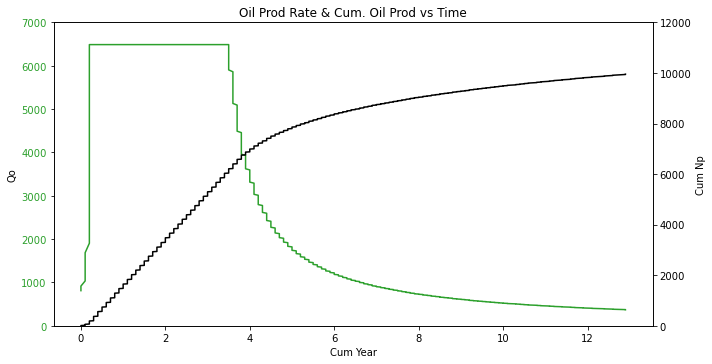

In [8]:
fig, ax1 = plt.subplots(figsize=(10, 5))
color = 'tab:green'
ax1.set_xlabel('Cum Year')
ax1.set_ylabel('Qo')
ax1.plot(x, y1, color = color)
ax1.tick_params(axis='y', labelcolor = color)
ax1.set_ylim(0, 7000)

ax2 = ax1.twinx()
color = 'k'
ax2.set_ylabel('Cum Np')
ax2.plot(x, y2, color = color)
ax2.tick_params(axis='y', labelcolor = color)
ax2.set_ylim(0, 12000)

fig.tight_layout()
plt.title('Oil Prod Rate & Cum. Oil Prod vs Time')
plt.show()

## Plot of Gas Rate and Gas Oil Ratio vs Time

In [9]:
x = test_1['Cum_Year']
y1 = test_1['Qg']
y2 = test_1['GOR']

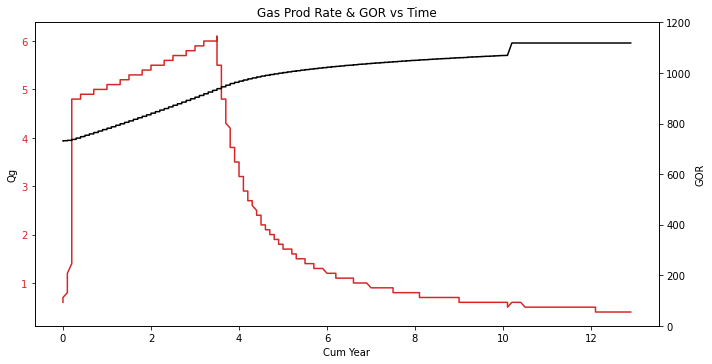

In [10]:
fig, ax1 = plt.subplots(figsize=(10, 5))
color = 'tab:red'
ax1.set_xlabel('Cum Year')
ax1.set_ylabel('Qg')
ax1.plot(x, y1, color = color)
ax1.tick_params(axis='y', labelcolor = color)
# ax1.set_ylim(0, 1.2)

# Overlap Plot
ax2 = ax1.twinx()
color = 'k'
ax2.set_ylabel('GOR')
ax2.plot(x, y2, color = color)
ax2.tick_params(axis='y', labelcolor = color)
ax2.set_ylim(0, 1200)

fig.tight_layout()
plt.title('Gas Prod Rate & GOR vs Time')
plt.show()

## Plot of Water Rate and Watercut vs Time

In [11]:
x = test_1['Cum_Year']
y1 = test_1['Qw']
y2 = test_1['WCUT']

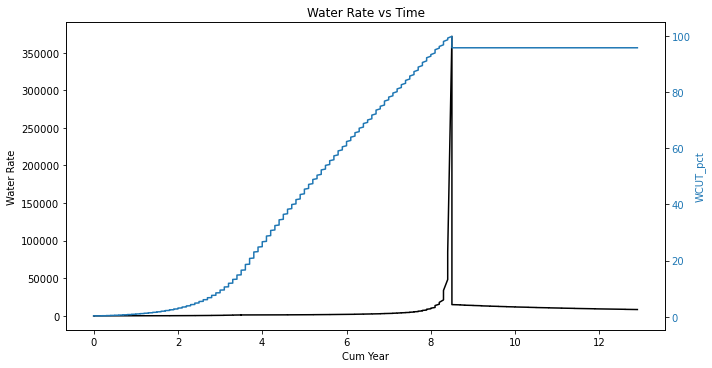

In [14]:
fig, ax1 = plt.subplots(figsize=(10, 5))
color = 'k'
ax1.set_xlabel('Cum Year')
ax1.set_ylabel('Water Rate')
ax1.plot(x, y1, color = color)
ax1.tick_params(axis='y', labelcolor = color)

# Overlap Plot
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('WCUT_pct', color=color)
ax2.plot(x, y2, color = color)
ax2.tick_params(axis='y', labelcolor = color)
# ax2.set_ylim(0, 1200)

fig.tight_layout()
plt.title('Water Rate vs Time')
plt.show()

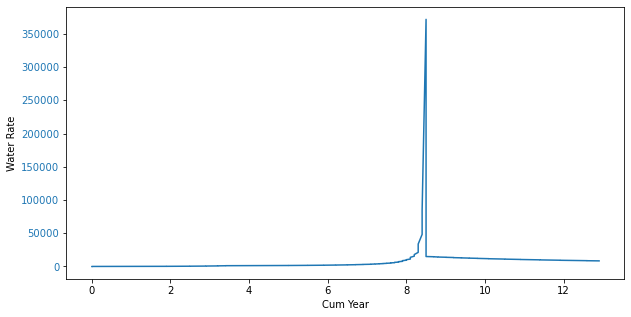

In [13]:
# fig, ax1 = plt.subplots(figsize=(10, 5))
# color = 'tab:blue'
# ax1.set_xlabel('Cum Year')
# ax1.set_ylabel('Water Rate')
# ax1.plot(x, y1, color = color)
# ax1.tick_params(axis='y', labelcolor = color)

## Plot of Reservoir Pressure vs Time

In [89]:
x = test_1['Cum_Year']
y1 = test_1['PRES']

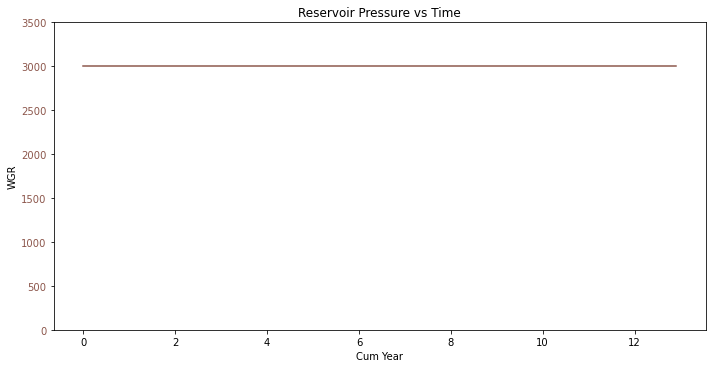

In [91]:
fig, ax1 = plt.subplots(figsize=(10, 5))
color = 'tab:brown'
ax1.set_xlabel('Cum Year')
ax1.set_ylabel('WGR')
ax1.plot(x, y1, color = color)
ax1.tick_params(axis='y', labelcolor = color)

fig.tight_layout()
plt.title('Reservoir Pressure vs Time')
plt.ylim(0, 3500)
plt.show()

In [38]:
try:  
    a = 100 / 0
    print (a)
except ZeroDivisionError:  
        print ("Zero Division Exception Raised." )
else:  
    print ("Success, no error!")

Zero Division Exception Raised.


In [45]:
try:
    a = np.array([10, 20, 30, 40])
    b = np.array([0, 2, 3, 4])
    c = a/b
    print(c)
except ZeroDivisionError:
            print ("Zero Division Exception Raised." )
else:  
    print ("Success, no error!")

[inf 10. 10. 10.]
Success, no error!


In [43]:
a = np.array([10, 20, 30, 40])
b = np.array([0, 2, 3, 4])
c = a/b

In [44]:
c

array([inf, 10., 10., 10.])

In [46]:
def divide(x, y):
    try:
        result = x / y
    except ZeroDivisionError:
        print("division by zero!")
    else:
        print("result is", result)
    finally:
        print("executing finally clause")

In [48]:
divide(10,0)

division by zero!
executing finally clause
